# Numerical Methods 04-3: Back to Where we Started (Code)

## Gabriel M Steward

### February 2023

<a id='toc'></a>

# Table of Contents
$$\label{toc}$$

[Problem 1](#P1) (The only one)

<a id='P1'></a>

# Problem 1 \[Back to [top](#toc)\]
$$\label{P1}$$

Pre part-a code, the two-loop root-then-square algorithm.

```
#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <stdbool.h>
#include <time.h> 

int main() {

    double x = 2.0;
    int N = 6; //set this to any integer you want, user. 

    for (int i = 0; i < N; i++) {
        x = sqrt(x);
    }
    for (int i = 0; i < N; i++) {
        x = x*x;
    }

    printf("%15.14e \n", x);

}
```

For part a), we print out N, the value of x at the end of the two loops, and the erorr we were instructed to use. 

```
#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <stdbool.h>
#include <time.h> 

double abss(double input) {
    //absolute values are simple. If negative, make positive. 
    if (input < 0) {
        input = input*-1;
    }
    return input; 
}

int main() {

    FILE *fp;
    fp = fopen("Result.txt","w");
    //Get ourselves a file. Not as useful for this program than others,
    //But we'll still put the result here. 

    double x = 2.0;
    int maxN = 50;
    for (int N = 0; N <= maxN; N++) {
        x = 2.0;
        for (int i = 0; i < N; i++) {
            x = sqrt(x);
        }
        for (int i = 0; i < N; i++) {
            x = x*x;
        }
        fprintf(fp, "%i, \t %16.15e, \t %16.15e \n", N, x, abss(2.0 - x)/2.0);
    }
    fclose(fp);

}
```

And then we take the ensuing file and plot it using matplotlib. 

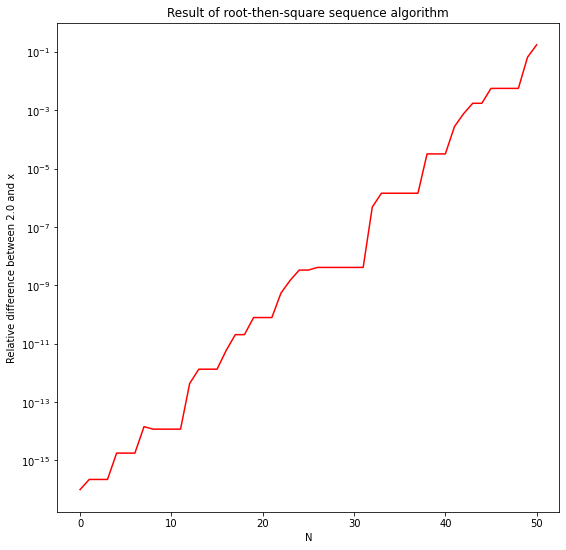

In [13]:
#plotting code borrowed from my ODESolver. 
import matplotlib.pyplot as plt

positionList = []
calculatedList = []

# csv file interface from https://www.dataquest.io/blog/read-file-python/
import csv
import sys
with open("ResultB.txt") as f: 
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        positionList.append(float(row[0]))
        calculatedList.append(float(row[2]))
        if (calculatedList[-1] < 1e-16):
            calculatedList[-1] = 1e-16

fig, ax = plt.subplots()
ax.set_xlabel('N')
ax.set_ylabel('Relative difference between 2.0 and x')
ax.set_title('Result of root-then-square sequence algorithm')
ax.plot(positionList, calculatedList, color='r') 
# https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib 
# setting size was annoying.
fig.set_size_inches(9,9)
plt.yscale("log")

Code for part b), printing out the values during the square root portion.
```
#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <stdbool.h>
#include <time.h> 

double abss(double input) {
    //absolute values are simple. If negative, make positive. 
    if (input < 0) {
        input = input*-1;
    }
    return input; 
}

int main() {

    FILE *fp;
    fp = fopen("Result.txt","w");
    //Get ourselves a file. Not as useful for this program than others,
    //But we'll still put the result here. 

    double x = 2.0;
    int maxN = 50;
    fprintf(fp, "i \t x\n");
    fprintf(fp, "0 \t %15.14e\n", x);
    for (int N = 0; N <= maxN; N++) {
        x = 2.0;
        for (int i = 0; i < N; i++) {
            x = sqrt(x);
            if (N == 50) {
                fprintf(fp, "%i \t %15.14e\n", i+1, x);
            }
        }
        for (int i = 0; i < N; i++) {
            x = x*x;
        }
        //fprintf(fp, "%i, \t %16.15e, \t %16.15e \n", N, x, abss(2.0 - x)/2.0);
    }
    fclose(fp);

}
```

The printout is as follows.

```
i 	 x
0 	 2.00000000000000e+00
1 	 1.41421356237310e+00
2 	 1.18920711500272e+00
3 	 1.09050773266526e+00
4 	 1.04427378242741e+00
5 	 1.02189714865412e+00
6 	 1.01088928605170e+00
7 	 1.00542990111280e+00
8 	 1.00271127505020e+00
9 	 1.00135471989211e+00
10 	 1.00067713069307e+00
11 	 1.00033850805268e+00
12 	 1.00016923970530e+00
13 	 1.00008461627269e+00
14 	 1.00004230724140e+00
15 	 1.00002115339696e+00
16 	 1.00001057664255e+00
17 	 1.00000528830729e+00
18 	 1.00000264415015e+00
19 	 1.00000132207420e+00
20 	 1.00000066103688e+00
21 	 1.00000033051839e+00
22 	 1.00000016525918e+00
23 	 1.00000008262959e+00
24 	 1.00000004131479e+00
25 	 1.00000002065740e+00
26 	 1.00000001032870e+00
27 	 1.00000000516435e+00
28 	 1.00000000258217e+00
29 	 1.00000000129109e+00
30 	 1.00000000064554e+00
31 	 1.00000000032277e+00
32 	 1.00000000016139e+00
33 	 1.00000000008069e+00
34 	 1.00000000004035e+00
35 	 1.00000000002017e+00
36 	 1.00000000001009e+00
37 	 1.00000000000504e+00
38 	 1.00000000000252e+00
39 	 1.00000000000126e+00
40 	 1.00000000000063e+00
41 	 1.00000000000032e+00
42 	 1.00000000000016e+00
43 	 1.00000000000008e+00
44 	 1.00000000000004e+00
45 	 1.00000000000002e+00
46 	 1.00000000000001e+00
47 	 1.00000000000000e+00
48 	 1.00000000000000e+00
49 	 1.00000000000000e+00
50 	 1.00000000000000e+00

```

Code for part c). Behaves the same algorithm-wise no matter what, but will either print out the table for part b) or the data for the graph of part a) depending on which print statements are commented/uncommented. The version posted here has the b) table active. 

Fewer comments than usual since the algorithm is explained extensively in the non-coding part of this assignment. 

```
#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <stdbool.h>
#include <time.h> 

double factorial(int n) {
    //Ugly factorial function. 
    //reports doubles not ints to support arbitrarily huge ressults.
    //Does not perform any checks or do anything to maximize efficiency.
    double result = (double)n;
    if (n == 0.0) {
        result = 1;
    } else {
        while (n > 1) {
            result = result*(n-1.0);
            n--;
        }
    }

    return result;
}

double abss(double input) {
    //absolute values are simple. If negative, make positive. 
    if (input < 0) {
        input = input*-1;
    }
    return input; 
}

double factorial2(int n) {
    //Ugly double factorial function, as declared in problem statement for homework 1.
    //Notably, the number we plug into here is always odd so we don't even need to program in
    //an evenness or oddness checker. 
    double result = (double)n;
    if (n == 0) {
        result = 1;
    } else {
        while (n > 2) {
            result = result*((double)n-2.0);
            n = n-2;
        }
    }

    return result;
}

double power(double x, int n) {
    //power function for positive exponents.
    if (n == 0) {
        return 1.0;
        //0 exponents are always 1.
    } else {
        double result = x; 
        while (n > 1) {
            result = result*x;
            n--;
        } 
        return result;
    }
}

int main() {

    FILE *fp;
    fp = fopen("Result.txt","w");
    //Get ourselves a file. Not as useful for this program than others,
    //But we'll still put the result here. 

    double x = 2.0;
    int maxN = 50;
    int n = 100; 
    fprintf(fp, "i \t a\n");
    fprintf(fp, "0 \t %15.14e\n", x-1.0);
    for (int N = 0; N <= maxN; N++) {
        x = 2.0;
        double a = x - 1.0;
        for (int i = 0; i < N; i++) {
            if (i == 0) {
                a = sqrt(a+1.0) - 1.0;
            } else {
                double aBuffer = 0.5*a;
                for (int j = 2; j <= n; j++) {
                    aBuffer = aBuffer + pow(a,j)*((factorial2(2.0*j-3.0)*pow(-1.0,j-1.0))/(factorial(j)*pow(2,j)));
                }
                a = aBuffer;
            }
            if (N == 50) {
                fprintf(fp, "%i \t %15.14e\n", i+1, a);
            }
        }
        for (int i = 0; i < N; i++) {
            a = a*a + 2*a;
        }
        x=a+1.0;
        //fprintf(fp, "%i, \t %15.14e, \t %15.14e \n", N, x, abss(2.0 - x)/2.0);
        //Uncomment to reproduce part a)
    }
    fclose(fp);

}

```

The table printed out akin to b)'s table is:

```
i 	 a
0 	 1.00000000000000e+00
1 	 4.14213562373095e-01
2 	 1.89207115002721e-01
3 	 9.05077326652577e-02
4 	 4.42737824274138e-02
5 	 2.18971486541167e-02
6 	 1.08892860517005e-02
7 	 5.42990111280282e-03
8 	 2.71127505020248e-03
9 	 1.35471989210821e-03
10 	 6.77130693066356e-04
11 	 3.38508052682313e-04
12 	 1.69239705302231e-04
13 	 8.46162726943131e-05
14 	 4.23072413958193e-05
15 	 2.11533969648081e-05
16 	 1.05766425497202e-05
17 	 5.28830729176311e-06
18 	 2.64415015011654e-06
19 	 1.32207420111818e-06
20 	 6.61036882074208e-07
21 	 3.30518386415902e-07
22 	 1.65259179552653e-07
23 	 8.26295863625022e-08
24 	 4.13147923277950e-08
25 	 2.06573959505335e-08
26 	 1.03286979219258e-08
27 	 5.16434894762763e-09
28 	 2.58217447048000e-09
29 	 1.29108723440655e-09
30 	 6.45543616994911e-10
31 	 3.22771808445364e-10
32 	 1.61385904209660e-10
33 	 8.06929521015741e-11
34 	 4.03464760499731e-11
35 	 2.01732380247831e-11
36 	 1.00866190123407e-11
37 	 5.04330950615762e-12
38 	 2.52165475307563e-12
39 	 1.26082737653702e-12
40 	 6.30413688268311e-13
41 	 3.15206844134106e-13
42 	 1.57603422067041e-13
43 	 7.88017110335172e-14
44 	 3.94008555167578e-14
45 	 1.97004277583787e-14
46 	 9.85021387918931e-15
47 	 4.92510693959464e-15
48 	 2.46255346979732e-15
49 	 1.23127673489866e-15
50 	 6.15638367449329e-16

```

Plotting code for the graph similar to part a) is below.

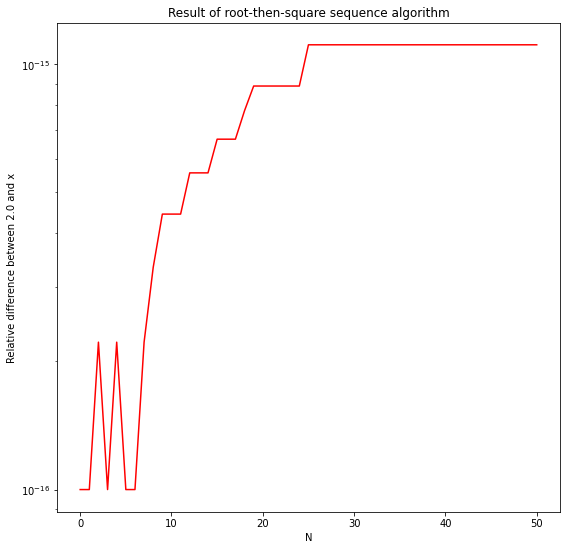

In [14]:
#plotting code borrowed from my ODESolver. 
import matplotlib.pyplot as plt

positionList = []
calculatedList = []

# csv file interface from https://www.dataquest.io/blog/read-file-python/
import csv
import sys
with open("ResultsC.txt") as f: 
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        positionList.append(float(row[0]))
        calculatedList.append(float(row[2]))
        if (calculatedList[-1] < 1e-16):
            calculatedList[-1] = 1e-16

fig, ax = plt.subplots()
ax.set_xlabel('N')
ax.set_ylabel('Relative difference between 2.0 and x')
ax.set_title('Result of root-then-square sequence algorithm')
ax.plot(positionList, calculatedList, color='r') 
# https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib 
# setting size was annoying.
fig.set_size_inches(9,9)
plt.yscale("log")